# Auto Ownership 
Validation to Household Travel Survey

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

## Regional Totals and Distribution

Text(0, 0.5, 'Household Vehicles Owned')

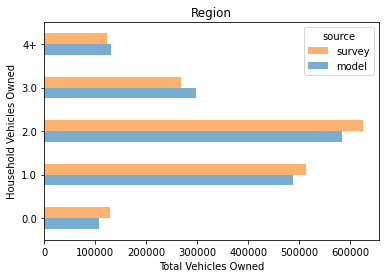

In [4]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel('Total Vehicles Owned')
ax.set_ylabel('Household Vehicles Owned')

Distribution of Vehicles Owned at Regional Scale

Text(0, 0.5, 'Household Vehicles Owned')

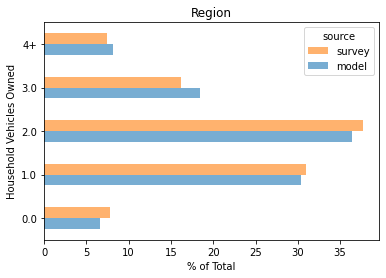

In [5]:
df['model'] = (df['model']/df['model'].sum()) * 100  
df['survey'] = (df['survey']/df['survey'].sum()) * 100  
df = df[['model', 'survey']]
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel("% of Total")
ax.set_ylabel('Household Vehicles Owned')

## SeaTac City Totals and Distribution

Text(0, 0.5, 'Household Vehicles Owned')

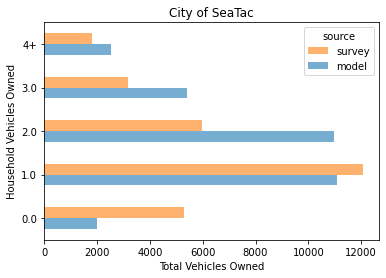

In [6]:
df = load_data('auto_ownership')
df = df[df['person_subarea'] == 1]
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
ax = df.plot(kind='barh', title='City of SeaTac', legend='reverse', alpha=0.6)
ax.set_xlabel('Total Vehicles Owned')
ax.set_ylabel('Household Vehicles Owned')

Text(0, 0.5, 'Household Vehicles Owned')

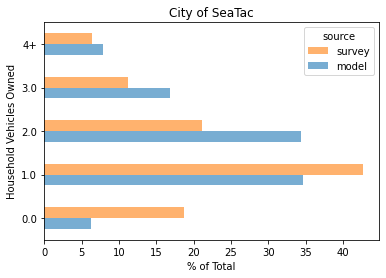

In [7]:
df['model'] = (df['model']/df['model'].sum()) * 100  
df['survey'] = (df['survey']/df['survey'].sum()) * 100  
df = df[['model', 'survey']]
ax = df.plot(kind='barh', title='City of SeaTac', legend='reverse', alpha=0.6)
ax.set_xlabel("% of Total")
ax.set_ylabel('Household Vehicles Owned')

## By Income

In [8]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df_total = pd.pivot_table(df, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k   >$75k
Household Vehicles Owned source                                  
0.0                      model   52,017   22,791   14,802  16,871
                         survey  64,043   27,901   17,279  20,465
1.0                      model  116,581  106,833  111,378 152,783
                         survey 138,715  102,527  110,953 160,079
2.0                      model   32,573   58,921  116,468 376,068
                         survey  90,579   85,436   77,247 371,635
3+                       model   11,549   23,459   63,948 328,096
                         survey  55,980   20,591   36,424 276,658
Total                    model  212,720  212,004  306,596 873,818
                         survey 349,316  236,456  241,903 828,838

#### By Income - City of SeaTac

In [9]:
df1 = df[df['person_subarea'] == 1]

df_total = pd.pivot_table(df1, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k  >$75k
Household Vehicles Owned source                                 
0.0                      model    1,034      593      254    128
                         survey   1,345        0    3,961      0
1.0                      model    2,957    3,695    2,527  1,894
                         survey   2,152    4,872    4,898    149
2.0                      model      678    2,035    2,951  5,303
                         survey     114      578       13  5,257
3+                       model      218      824    1,725  5,148
                         survey       0        0        0  4,958
Total                    model    4,887    7,147    7,457 12,473
                         survey   3,611    5,450    8,872 10,364

#### By Income - Other

In [10]:
df2 = df[df['person_subarea'] != 1]

df_total = pd.pivot_table(df2, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k   >$75k
Household Vehicles Owned source                                  
0.0                      model   50,983   22,198   14,548  16,743
                         survey  62,698   27,901   13,318  20,465
1.0                      model  113,624  103,138  108,851 150,889
                         survey 136,563   97,654  106,055 159,930
2.0                      model   31,895   56,886  113,517 370,765
                         survey  90,464   84,859   77,234 366,378
3+                       model   11,331   22,635   62,223 322,948
                         survey  55,980   20,591   36,424 271,701
Total                    model  207,833  204,857  299,139 861,345
                         survey 345,705  231,005  233,031 818,474

In [11]:
pd.options.display.float_format = "{:,.2%}".format
df = df.rename(columns={'hhvehs':'Household Vehicles Owned'})
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()  * 100
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()  * 100

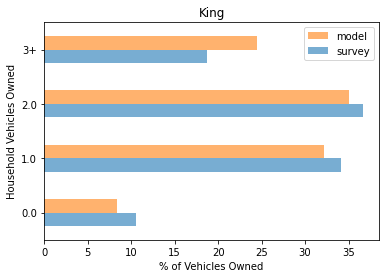

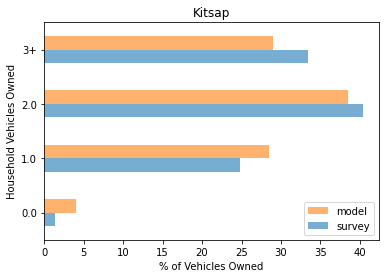

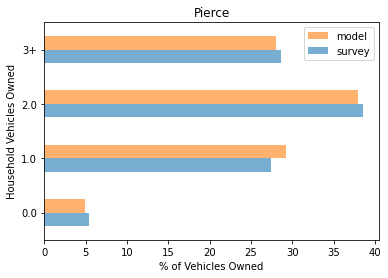

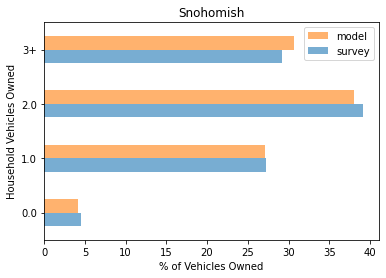

In [12]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    ax = _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)
    ax.set_xlabel('% of Vehicles Owned')

In [13]:
pd.options.display.float_format = "{:,.2%}".format
df = df.rename(columns={'hhvehs':'Household Vehicles Owned'})
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='Household Vehicles Owned', columns='person_subarea', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()  * 100
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='Household Vehicles Owned', columns='person_subarea', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()  * 100

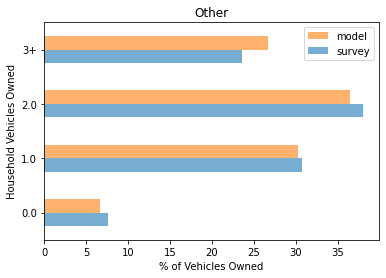

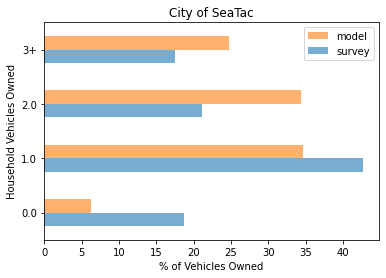

In [14]:
chart_title = ['Other','City of SeaTac']
for county in df['person_subarea'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    ax = _df.plot(kind='barh', title=chart_title[county], legend='reverse', alpha=0.6)
    ax.set_xlabel('% of Vehicles Owned')